In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification


from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
 

In [2]:

df = pd.read_csv('UNSW_NB15_training-setbinaryclass.csv')

In [3]:
df = df.sample(n=80000, replace=True)

In [6]:
df.to_csv("D://Model/binary class model/binary-SampleDS.csv")

In [4]:
df.shape

(80000, 45)

In [6]:
df.label.value_counts()

1    43955
0    36045
Name: label, dtype: int64

In [7]:
df['proto'] = df['proto'].astype('category')
df['service'] = df['service'].astype('category')
df['state'] = df['state'].astype('category')

cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [8]:
categorical_feature_mask = df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()

In [9]:
X = df.iloc[:, :-2]
Y=df['label']

In [10]:
X

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
54468,54469,0.000007,117,2,3,2,0,114,0,142857.140900,...,4,4,4,4,0,0,0,4,11,0
68847,68848,0.000002,117,0,3,2,0,104,0,500000.001300,...,1,1,1,2,0,0,0,1,2,0
74007,74008,0.000000,6,0,3,1,0,46,0,0.000000,...,1,1,1,1,0,0,0,1,1,1
54749,54750,0.912468,111,5,2,28,136,1966,172106,178.636398,...,5,1,1,1,0,0,1,1,1,0
1761,1762,0.000003,117,0,3,2,0,168,0,333333.321500,...,1,1,1,1,0,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42398,42399,0.921178,111,0,2,10,8,534,354,18.454631,...,2,1,1,2,0,0,0,2,3,0
74933,74934,0.000003,117,0,3,2,0,104,0,333333.321500,...,1,1,1,3,0,0,0,1,3,0
41386,41387,0.301283,111,0,1,6,2,998,86,23.233969,...,3,3,1,3,0,0,0,4,3,0
18065,18066,0.000005,117,2,3,2,0,114,0,200000.005100,...,18,18,18,34,0,0,0,19,34,0


In [11]:
Y

54468    1
68847    0
74007    0
54749    1
1761     1
        ..
42398    0
74933    0
41386    0
18065    1
29913    0
Name: label, Length: 80000, dtype: int64

In [12]:
#Extra Tree classifier code for Minimu Feature
from sklearn.ensemble import ExtraTreesClassifier
# Create an Extra Trees Classifier
extra_trees = ExtraTreesClassifier()

# Fit the model to your data
extra_trees.fit(X, Y)

# Print feature importances
feature_importances = extra_trees.feature_importances_
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

Feature Importances:
id: 0.19707820949084653
dur: 0.005950040019973949
proto: 0.006180022233241782
service: 0.029044492451659812
state: 0.04520478130835601
spkts: 0.003939721926735559
dpkts: 0.003749684698929643
sbytes: 0.01216536785999709
dbytes: 0.0042877548066309334
rate: 0.01852265380095206
sttl: 0.1228085822174216
dttl: 0.07012104262104703
sload: 0.009826202520406644
dload: 0.01847667547132138
sloss: 0.004412444922862109
dloss: 0.004762603035485776
sinpkt: 0.009232450932280286
dinpkt: 0.003148577036401714
sjit: 0.0030554269134300143
djit: 0.0036867532598647643
swin: 0.04775764649834894
stcpb: 0.010913849151381494
dtcpb: 0.011699915917061347
dwin: 0.025901694312494106
tcprtt: 0.009155805586974321
synack: 0.009039947732011533
ackdat: 0.0064674914495212775
smean: 0.021526164601907153
dmean: 0.018340819574014802
trans_depth: 0.007515510087695295
response_body_len: 0.002025503632056026
ct_srv_src: 0.01924663551556076
ct_state_ttl: 0.059909475526556094
ct_dst_ltm: 0.01109907687915796
ct

In [13]:
# Print feature importances in sorted order
feature_importances = extra_trees.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort indices in descending order

print("Feature Importances (Sorted):")
for index in sorted_indices:
    print(f"{X.columns[index]}: {feature_importances[index]}")
# Define importance threshold
threshold = 0.021

# Print selected features with importance >= threshold
print("Selected Features with Importance >= 0.021:")
for feature, importance in zip(X.columns, extra_trees.feature_importances_):
    if importance >= threshold:
        print(f"{feature}: {importance}")

Feature Importances (Sorted):
id: 0.19707820949084653
sttl: 0.1228085822174216
dttl: 0.07012104262104703
ct_dst_src_ltm: 0.0613092932627367
ct_state_ttl: 0.059909475526556094
swin: 0.04775764649834894
state: 0.04520478130835601
ct_dst_sport_ltm: 0.03495490651251585
service: 0.029044492451659812
ct_srv_dst: 0.028855840338082486
dwin: 0.025901694312494106
smean: 0.021526164601907153
ct_srv_src: 0.01924663551556076
rate: 0.01852265380095206
dload: 0.01847667547132138
dmean: 0.018340819574014802
ct_src_dport_ltm: 0.017516969649079724
sbytes: 0.01216536785999709
dtcpb: 0.011699915917061347
ct_dst_ltm: 0.01109907687915796
ct_src_ltm: 0.0110724924177755
stcpb: 0.010913849151381494
sload: 0.009826202520406644
sinpkt: 0.009232450932280286
tcprtt: 0.009155805586974321
synack: 0.009039947732011533
trans_depth: 0.007515510087695295
ackdat: 0.0064674914495212775
proto: 0.006180022233241782
dur: 0.005950040019973949
is_sm_ips_ports: 0.005333024857616401
dloss: 0.004762603035485776
sloss: 0.004412444

In [14]:
threshold = 0.021

# Select features with importance >= threshold
selected_features = []
for index, importance in enumerate(extra_trees.feature_importances_):
    if importance >= threshold:
        selected_features.append(X.columns[index])

# Filter X based on selected features
X = X[selected_features]

# Now you can use X_selected for further processing
print("Selected Features:", selected_features)
print("Shape of X_selected:", X.shape)

Selected Features: ['id', 'service', 'state', 'sttl', 'dttl', 'swin', 'dwin', 'smean', 'ct_state_ttl', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_srv_dst']
Shape of X_selected: (80000, 12)


In [20]:
dfETC=pd.DataFrame(X_new)
dfETC.to_csv("D://Model/binary class model/binary-extraDFETC.csv")

In [15]:
from sklearn.preprocessing import StandardScaler
sScaler = StandardScaler()
rescaleX = sScaler.fit_transform(X)
df_rescaled = pd.DataFrame(data=rescaleX)

In [22]:
df_rescaled.to_csv("D://Model/binary class model/binary-StandardScalar.csv")

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(rescaleX, Y, test_size=0.3, random_state=10)

In [25]:
XTr=pd.DataFrame(X_train)
XTr.to_csv("D://Model/binary class model/binary-XTrXTr.csv")

In [26]:
XTe=pd.DataFrame(X_test)
XTe.to_csv("D://Model/binary class model/binary-X_test.csv")

In [27]:
yTe=pd.DataFrame(y_test)
yTe.to_csv("D://Model/binary class model/binary-y_test.csv")

In [28]:
yTr=pd.DataFrame(y_train)
yTr.to_csv("D://Model/binary class model/binary-y_train.csv")

In [100]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [102]:
y_test

37237    6
75043    6
37673    6
73745    6
49734    4
        ..
55713    4
35076    6
71855    6
18416    5
50839    3
Name: attack_cat, Length: 24000, dtype: int8

In [15]:
model = RandomForestClassifier(oob_score=True)
# Fit on training data
modelhistory=model.fit(X_train, y_train)
rf_predictions = model.predict(X_test)

#testing set accuracy
print("Accuracy:",metrics.accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

Accuracy: 0.9999583333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10798
           1       1.00      1.00      1.00     13202

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000



In [16]:
pd.crosstab(y_test, rf_predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,10797,1,10798
1,0,13202,13202
All,10797,13203,24000


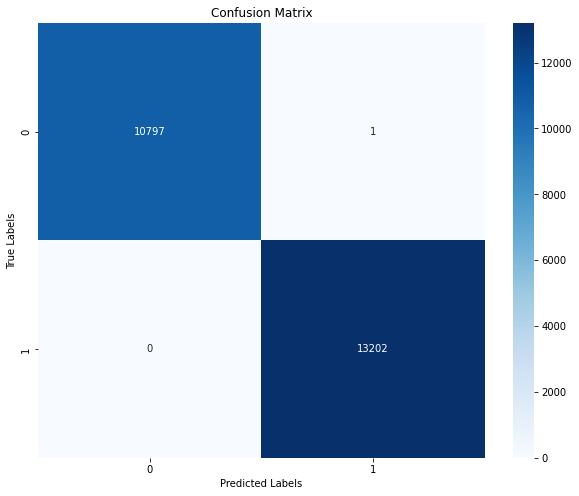

In [17]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
classes = ['0', '1']
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,rf_predictions)



# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

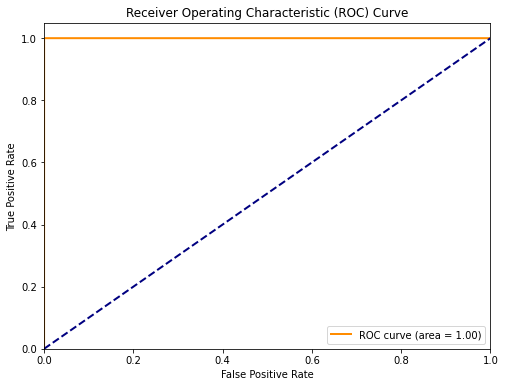

In [18]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, rf_predictions)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

